In [1]:
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

### Maps with python

- **Basemap**: Matplotlib Basemap Toolkit
- **Cartopy**: Cartographic tools for python
- **Mplleaflet**: convert matplotlib plots into interactive Leaflet web maps
- **Folium**: Python Data. Leaflet.js Maps
- **Bokeh**: Python interactive visualization library

### Basemap

http://matplotlib.org/basemap/

http://matplotlib.org/basemap/users/examples.html

#### Pros

- the first widely used python mapping library;
- inspired by Matlab's `m_map` (easy learning curve);
- shipped as a `mpl_toolkit` (part of `matplotlib`);
- 25 different map projections;
- fully functional at install time. All third party code source and data are bundled in one big package: `geos`, `proj.4` (via `pyproj`), coastlines, rivers, and political data boundaries, etc.

#### Cons

- basemap is a heavy download (>100mb);
- the shipped code can make it inconsistent with installed libraries;
- outdated political boundary data;
- does not handle the dateline properly.

#### Basemap basics

In [2]:
from mpl_toolkits.basemap import Basemap

m = Basemap()

[method for method in dir(m) if not method.startswith('_')]

['anchor',
 'arcgisimage',
 'area_thresh',
 'aspect',
 'ax',
 'barbs',
 'bluemarble',
 'boundarylats',
 'boundarylonmax',
 'boundarylonmin',
 'boundarylons',
 'boundinglat',
 'celestial',
 'coastpolygons',
 'coastpolygontypes',
 'coastsegs',
 'colorbar',
 'contour',
 'contourf',
 'drawcoastlines',
 'drawcounties',
 'drawcountries',
 'drawgreatcircle',
 'drawlsmask',
 'drawmapboundary',
 'drawmapscale',
 'drawmeridians',
 'drawparallels',
 'drawrivers',
 'drawstates',
 'ellipsoid',
 'epsg',
 'esq',
 'etopo',
 'fillcontinents',
 'fix_aspect',
 'flattening',
 'gcpoints',
 'hexbin',
 'imshow',
 'is_land',
 'lakepolygons',
 'landpolygons',
 'latmax',
 'latmin',
 'llcrnrlat',
 'llcrnrlon',
 'llcrnrx',
 'llcrnry',
 'lonmax',
 'lonmin',
 'lsmask',
 'makegrid',
 'nightshade',
 'noticks',
 'pcolor',
 'pcolormesh',
 'plot',
 'proj4string',
 'projection',
 'projparams',
 'projtran',
 'quiver',
 'readshapefile',
 'resolution',
 'rmajor',
 'rminor',
 'rotate_vector',
 'round',
 'scatter',
 'set_axes

#### Basemap raster overlay

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [4]:
def make_map(img, lonStart=-48, lonEnd=-32,
             latStart=-30, latEnd=-18):
    fig, ax = plt.subplots(figsize=(6, 6), facecolor='w')
    m = Basemap(projection='merc', ax=ax,
                llcrnrlon=lonStart, urcrnrlon=lonEnd,
                llcrnrlat=latStart, urcrnrlat=latEnd,
                resolution='c', lat_ts=(latStart + latEnd) / 2.)
    m.imshow(plt.imread(img), origin='upper', alpha=0.75)
    lon_lim, lat_lim = m([-42, lonEnd], [-26, latEnd])
    m.ax.axis([lon_lim[0], lon_lim[1],
               lat_lim[0], lat_lim[1]])
    dx = dy = 2
    meridians = np.arange(-42, lonEnd + dy, dy)
    parallels = np.arange(-26,  latEnd + dx, dx)
    xoffset = -lon_lim[0] + 1e4
    yoffset = -lat_lim[0] + 1e4
    kw = dict(linewidth=0)
    m.drawparallels(parallels, xoffset=xoffset,
                    labels=[1, 0, 0, 0], **kw)
    m.drawmeridians(meridians, yoffset=yoffset,
                    labels=[0, 0, 0, 1], **kw)
    return fig, m

In [5]:
lon = [-40.77, -40.51, -40.30, -40.23, -40.13, -40.06, -39.99,
       -39.87, -39.72, -39.52, -39.32, -39.11, -38.91, -38.71]

lat = [-21.29, -21.39, -21.48, -21.51, -21.56, -21.58, -21.62,
       -21.69, -21.76, -21.86, -21.96, -22.08, -22.15, -22.25]

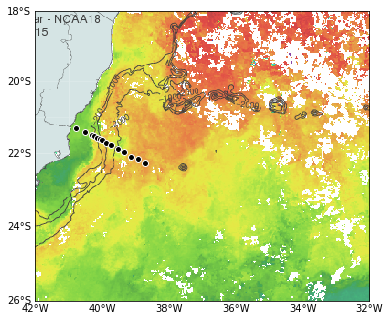

In [6]:
fig, m = make_map(img='./data/AVHRR.png')
kw = dict(marker='o', markerfacecolor='k',
          markeredgecolor='w', markersize=6, linestyle='none')
pts = m.plot(*m(lon, lat), **kw)

#### Shipped data is a little bit outdated in some areas

(Brazil states boundaries seems to be stuck in 1943!)

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

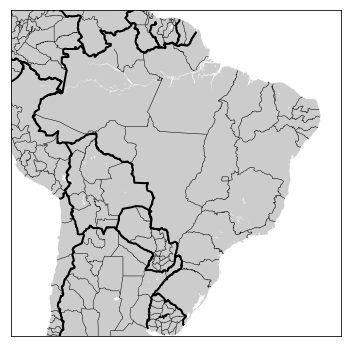

In [8]:
fig, ax = plt.subplots(figsize=(6, 6))
m = Basemap(projection='merc', resolution='i', ax=ax,
            llcrnrlat=-35, urcrnrlat=7,
            llcrnrlon=-77, urcrnrlon=-32)
m.fillcontinents(); m.drawcountries(linewidth=2)
states = m.drawstates(linewidth=0.5)

#### Does not handle the dateline well

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap

In [10]:
def make_basemap(projection='robin', resolution='c'):
    fig, ax = plt.subplots(figsize=(8, 8))
    m = Basemap(projection=projection, resolution=resolution,
                lon_0=0, ax=ax)
    m.drawcoastlines()
    m.fillcontinents(color='0.85')
    parallels = np.arange(-60, 90, 30.)
    meridians = np.arange(-360, 360, 60.)
    m.drawparallels(parallels, labels=[1, 0, 0, 0])
    m.drawmeridians(meridians, labels=[0, 0, 1, 0])
    return fig, m

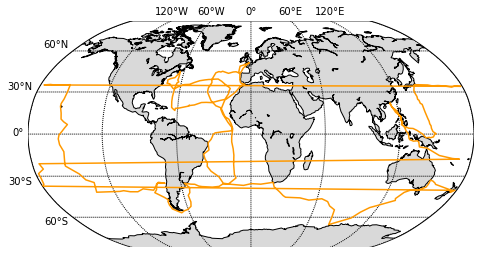

In [11]:
kw = dict(color='#FF9900', linestyle='-', linewidth=1.5)
lon, lat = np.loadtxt('./data/challenger_path.csv',
                      delimiter=',', unpack=True)

fig, m = make_basemap()
pts = m.plot(*m(lon, lat), **kw) # Could use latlon=True kw.

### Cartopy

http://scitools.org.uk/cartopy/

http://scitools.org.uk/cartopy/docs/latest/gallery.html

#### Pros

- object oriented projection definitions;
- tight integration to expose advanced mapping in `matplotlib`;
- solves the dateline problem;
- download extra data on request.

#### Cons

- fewer projections implemented than `basemap`;
- not all the functionality exists as methods and some work is needed to implement them (like `basemap`'s `is_land`).

#### Cartopy basics

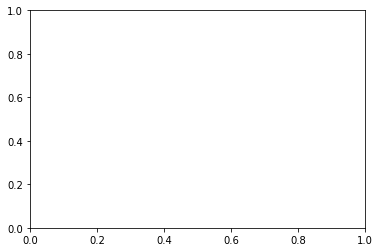

In [12]:
fig, default_ax = plt.subplots()
default_ax = set([method for method in dir(default_ax)])

{'_boundary',
 '_done_img_factory',
 '_get_extent_geom',
 '_gridliners',
 '_pcolormesh_patched',
 '_regrid_shape_aspect',
 'add_feature',
 'add_geometries',
 'add_raster',
 'add_wms',
 'add_wmts',
 'background_img',
 'background_patch',
 'coastlines',
 'get_extent',
 'gridlines',
 'hold_limits',
 'img_factories',
 'natural_earth_shp',
 'outline_patch',
 'projection',
 'read_user_background_images',
 'set_boundary',
 'set_extent',
 'set_global',
 'stock_img',
 'tissot'}

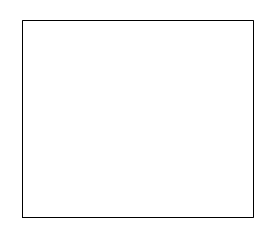

In [13]:
import cartopy.crs as ccrs

geo_axis = plt.axes(projection=ccrs.Mercator())
geo_axis = set([method for method in dir(geo_axis)])
geo_axis.difference(default_ax)

#### Up-to-date external (on demand) data

In [14]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [15]:
def brazil_states(proj=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(8, 6),
                           subplot_kw=dict(projection=proj))
    ax.stock_img()
    ax.add_feature(LAND)
    ax.add_feature(COASTLINE)
    ax.set_extent([-82, -32, -45, 10])
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

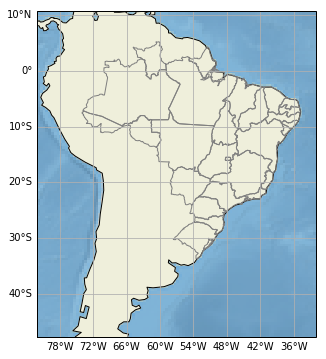

In [16]:
fig, ax = brazil_states()
states = NaturalEarthFeature(category='cultural',
                             scale='50m', facecolor='none',
                             name='admin_1_states_provinces_shp')
states = ax.add_feature(states, edgecolor='gray')

#### Nice dateline plotting

In [17]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [18]:
def make_cartopy(proj=ccrs.Robinson(), figsize=(8, 8),
                 resolution='110m'):
    fig, ax = plt.subplots(figsize=figsize,
                           subplot_kw=dict(projection=proj))
    ax.set_global()
    ax.coastlines(resolution=resolution, color='k')
    gl = ax.gridlines(draw_labels=False)
    ax.add_feature(cfeature.LAND, facecolor='0.75')
    return fig, ax

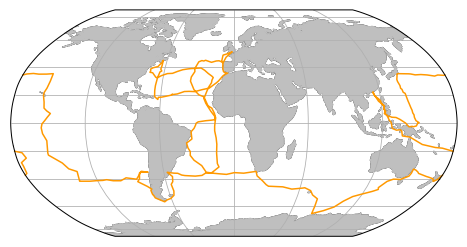

In [19]:
fig, ax = make_cartopy(proj=ccrs.Robinson(), resolution='110m')
pts = ax.plot(lon, lat, transform=ccrs.Geodetic(), **kw)

#### WMS, WTMS, Shapefile, raster, etc

In [20]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [21]:
def make_map(projection=ccrs.PlateCarree()):
    subplot_kw = dict(projection=projection)
    fig, ax = plt.subplots(subplot_kw=subplot_kw)
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

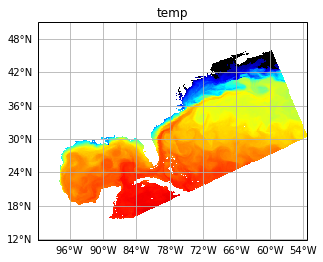

In [22]:
from owslib.wms import WebMapService

url = ('http://geoport-dev.whoi.edu/thredds/wms/coawst_4/'
       'use/fmrc/coawst_4_use_best.ncd')
wms = WebMapService(url)
layer = 'temp'
bbox = wms[layer].boundingBoxWGS84

fig, ax = make_map(projection=ccrs.PlateCarree())
ax.set_extent([bbox[0], bbox[2], bbox[1], bbox[3]])
ax.add_wms(wms, layer)
title = ax.set_title(layer)

#### Leverage shapefile handling with `shapely`

In [23]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import shapely.geometry as sgeom

import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

In [24]:
lons = [-75.1, -75.7, -76.2, -76.5, -76.9, -77.7, -78.4, -79.0,
        -79.6, -80.1, -80.3, -81.3, -82.0, -82.6, -83.3, -84.0,
        -84.7, -85.3, -85.9, -86.7, -87.7, -88.6, -89.2, -89.6,
        -89.6, -89.6, -89.6, -89.6, -89.1, -88.6, -88.0, -87.0,
        -85.3, -82.9]

lats = [23.1, 23.4, 23.8, 24.5, 25.4, 26.0, 26.1, 26.2, 26.2, 26.0,
        25.9, 25.4, 25.1, 24.9, 24.6, 24.4, 24.4, 24.5, 24.8, 25.2,
        25.7, 26.3, 27.2, 28.2, 29.3, 29.5, 30.2, 31.1, 32.6, 34.1,
        35.6, 37.0, 38.6, 40.1]

In [25]:
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                     category='cultural',
                                     name=shapename)
track = sgeom.LineString(list(zip(lons, lats)))
track_buffer = track.buffer(2)

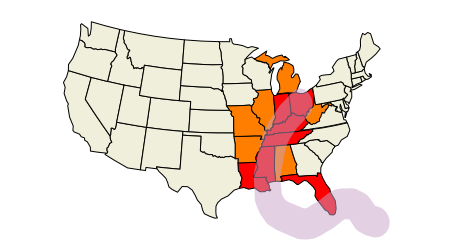

In [26]:
ax = plt.axes([0, 0, 1, 1], projection=ccrs.LambertConformal())
ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())
ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)
for state in shpreader.Reader(states_shp).geometries():
    facecolor = [0.9375, 0.9375, 0.859375]; edgecolor = 'black'
    if state.intersects(track): facecolor = 'red'
    elif state.intersects(track_buffer): facecolor = '#FF7E00'
    ax.add_geometries([state], ccrs.PlateCarree(), facecolor=facecolor,
                      edgecolor=edgecolor)
ax.add_geometries([track_buffer], ccrs.PlateCarree(), alpha=0.5,
                  facecolor='#C8A2C8')
ax.add_geometries([track], ccrs.PlateCarree(), facecolor='none')
direct_hit = mpatches.Rectangle((0, 0), 1, 1, facecolor='red')
within_2_deg = mpatches.Rectangle((0, 0), 1, 1,
                                  facecolor='#FF7E00')

### Both `basemap` and `cartopy` are OK for 2D static maps (illustrations, papers, etc)

### What if we need interactive web maps?

### Mplleaflet

https://github.com/jwass/mplleaflet

#### Pros

- dead simple `matplotlib` to `leaflet` conversion.

#### Cons

- limited `leaflet` functionality;
- some awkward hacks to "make things work."

#### Example

In [27]:
import gpxpy
from pandas import DataFrame

gpx = gpxpy.parse(open('./data/2014_08_05_farol.gpx'))
segment = gpx.tracks[0].segments[0]

data = []
segment_length = segment.length_3d()
for point_idx, point in enumerate(segment.points):
    data.append([point.longitude, point.latitude,
                 point.elevation, point.time, segment.get_speed(point_idx)])
    
columns = ['Longitude', 'Latitude', 'Altitude', 'Time', 'Speed']
df = DataFrame(data, columns=columns)

In [28]:
import numpy as np
import seawater as sw

_, angles = sw.dist(df['Latitude'], df['Longitude'])
angles = np.r_[0, np.deg2rad(angles)]

# Normalize the speed to use as the length of the arrows.
r = df['Speed'] / df['Speed'].max()
kw = dict(window_len=31, window='hanning')
df['u'] = r * np.cos(angles)
df['v'] = r * np.sin(angles)

df = df.dropna()

sub = 10
x = df['Longitude'][::sub]
y = df['Latitude'][::sub]
u = df['u'][::sub]
v = df['v'][::sub]

In [29]:
import mplleaflet

fig, ax = plt.subplots()
ax.plot(df['Longitude'], df['Latitude'],
        color='darkorange', linewidth=5, alpha=0.5)
ax.quiver(x, y, u, v, color='deepskyblue', alpha=0.8, scale=10)

mplleaflet.display(fig=fig, tiles='thunderforest_landscape')

### Folium

https://folium.readthedocs.org/en/latest/

#### Pros

- complete (!?) implementation of `leaflet` functionality in python.

#### Cons

- higher complexity than `mplleaflet` for simple maps.

In [30]:
import folium

mapa = folium.Map(location=[28.1, -81.6], zoom_start=5)

In [31]:
url = ('http://geoport-dev.whoi.edu/thredds/wms/coawst_4/use/'
       'fmrc/coawst_4_use_best.ncd')

folium.WmsTileLayer(name='coawst_4', url=url,
                    layers='temp', styles='boxfill/ferret',
                    format='image/png').add_to(mapa);

In [32]:
folium.LayerControl().add_to(mapa);
mapa

In [33]:
import geopandas

path = './data/{}'.format
hidro = geopandas.GeoDataFrame.from_file(path('ENC_Hidreletrica_P.shp'))
termo = geopandas.GeoDataFrame.from_file(path('ENC_Termeletrica_P.shp'))

gjson = hidro.to_crs(epsg='4326').to_json()

In [34]:
table = """
<!DOCTYPE html>
<html>
<head>
<style>
table {{
    width:100%;
}}
table, th, td {{
    border: 1px solid black;
    border-collapse: collapse;
}}
th, td {{
    padding: 5px;
    text-align: left;
}}
table#t01 tr:nth-child(odd) {{
    background-color: #eee;
}}
table#t01 tr:nth-child(even) {{
   background-color:#fff;
}}
</style>
</head>
<body>

<table id="t01">
  <tr>
    <td>Type</td>
    <td>{}</td>
  </tr>
  <tr>
    <td>Name</td>
    <td>{}</td>
  </tr>
  <tr>
    <td>Operational</td>
    <td>{}</td>
  </tr>
</table>
</body>
</html>
""".format

In [35]:
import folium

mapa = folium.Map([-15.783333, -47.866667],
                  zoom_start=4,
                  tiles='cartodbpositron')

In [36]:
from folium import IFrame
from folium.plugins import MarkerCluster

width, height = 310, 110
popups, locations = [], []
for idx, row in hidro.iterrows():
    locations.append([row['geometry'].y, row['geometry'].x])
    name = row['NOME'].encode('ascii', 'xmlcharrefreplace')
    if row['OPERACIONA'] == 'Sim':
        opr = 'Yes'
    elif row['OPERACIONA'] == u'Não':
        opr = 'No'
    else:
        opr = 'NA'
    iframe = IFrame(table('Hydroelectric', name, opr), width=width, height=height)
    popups.append(iframe)
    
h = folium.FeatureGroup(name='Hydroelectric')
h.layer_name = 'Hydroelectric'
h.add_children(MarkerCluster(locations=locations, popups=popups))
mapa.add_children(h);

In [37]:
popups, locations = [], []
for idx, row in termo.iterrows():
    locations.append([row['geometry'].y, row['geometry'].x])
    name = row['NOME'].encode('ascii', 'xmlcharrefreplace')
    if row['OPERACIONA'] == 'Sim':
        opr = 'Yes'
    elif row['OPERACIONA'] == u'Não':
        opr = 'No'
    else:
        opr = 'NA'
    iframe = IFrame(table('Thermoelectric', name, opr), width=width, height=height)
    popups.append(iframe)

t = folium.FeatureGroup()
t.layer_name = 'Thermoelectric'
t.add_children(MarkerCluster(locations=locations, popups=popups))
mapa.add_children(t)

mapa.add_children(folium.LayerControl());

In [38]:
mapa

#### Folium maps can use a mix of GeoJSON, Text/HTML popups, WMS/WTMS/Raster layers, etc

- [IOOS Demonstration](http://nbviewer.jupyter.org/github/ocefpaf/sscsw/blob/master/IOOS_data_demo.ipynb)
- [Raster](http://nbviewer.jupyter.org/github/ocefpaf/folium_notebooks/blob/master/test_image_overlay_gulf_stream.ipynb)
- [Choropleth](http://nbviewer.jupyter.org/github/ocefpaf/folium_notebooks/blob/master/test_choropleth_negative_values.ipynb)
- [Heatmap](http://nbviewer.jupyter.org/github/ocefpaf/folium_notebooks/blob/master/test_heatmap.ipynb)
- [Cesium 3D](http://nbviewer.jupyter.org/github/ocefpaf/folium_notebooks/blob/master/test_3D.ipynb)

### Bokeh

http://bokeh.pydata.org/en/latest/

#### Pros
- `mplleaflet`+`folium`+ much more.

#### Cons
- very complex for simple graphs. (Not sure it is worth using `bokeh` for mapping...)

In [39]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [40]:
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.tile_providers import STAMEN_TONER

bound = 20000000 # meters
fig = figure(tools='pan, wheel_zoom', x_range=(-bound, bound), y_range=(-bound, bound))
fig.axis.visible = False
fig.add_tile(STAMEN_TONER)
show(fig)

### Interactive mapping summary:

- `mplleaflet` for simple `matplotlib` &rarr; `leaflet`;
- `folium` for a complete `leaflet` python wrapper;
- `bokeh` if you feeling adventurous ;-)

### Questions?

![usa_map](http://imgs.xkcd.com/comics/united_states_map.png )

# Extras 0: Some links

http://ocefpaf.github.io/python4oceanographers/

http://nbviewer.jupyter.org/github/ocefpaf/folium_notebooks/tree/master/

# Extras 1: Custom projections

In [41]:
import numpy as np
import numpy.ma as ma


infile = './data/nt_20150326_f17_nrt_n.bin'
with open(infile, 'rb') as fr:
    hdr = fr.read(300)
    ice = np.fromfile(fr, dtype=np.uint8)

ice = ice.reshape(448, 304)

ice = ice / 250.

ice = ma.masked_greater(ice, 1.0)

dx = dy = 25000

x = np.arange(-3850000, +3750000, +dx)
y = np.arange(+5850000, -5350000, -dy)

In [42]:
!head -10 ./data/nt_20150326_f17_nrt_n.bin.txt

Name: nt_20150326_f17_nrt_n.bin
Grid Name: Polar Stereo Northern 25km
NSIDC GPD File Name: ftp://sidads.colorado.edu/pub/tools/mapx/nsidc_maps/N3B.gpd
Data Offset: 300
Data Type: UNSIGNED_INTEGER
Bytes Per Pixel:1
Byte Order: n/a
Image Width: 304
Image Height: 448
Proj.4 Projection: +proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +k=1 +x_0=0 +y_0=0 +a=6378273 +b=6356889.449 +units=m +no_defs


In [43]:
import cartopy.crs as ccrs

class Custom(ccrs.Projection):
    
    def __init__(self):
        proj4_params = {'proj': 'stere', 'lat_0': 90, 'lat_ts': 70,
                        'lon_0': -45+360, 'k': 1, 'x_0': 0, 'y_0': 0,
                        'a': 6378273, 'b': 6356889.449, 'units': 'm'}

        super(Custom, self).__init__(proj4_params)

    @property
    def boundary(self):
        coords = ((self.x_limits[0], self.y_limits[0]),(self.x_limits[1], self.y_limits[0]),
                  (self.x_limits[1], self.y_limits[1]),(self.x_limits[0], self.y_limits[1]),
                  (self.x_limits[0], self.y_limits[0]))

        return ccrs.sgeom.Polygon(coords).exterior

    @property
    def x_limits(self):
        return (3750000.0, -3850000.0)

    @property
    def y_limits(self):
        return (-5350000.0, 5850000.0)
    
    @property
    def threshold(self):
        return 100000.0

<IPython.core.display.Javascript object>


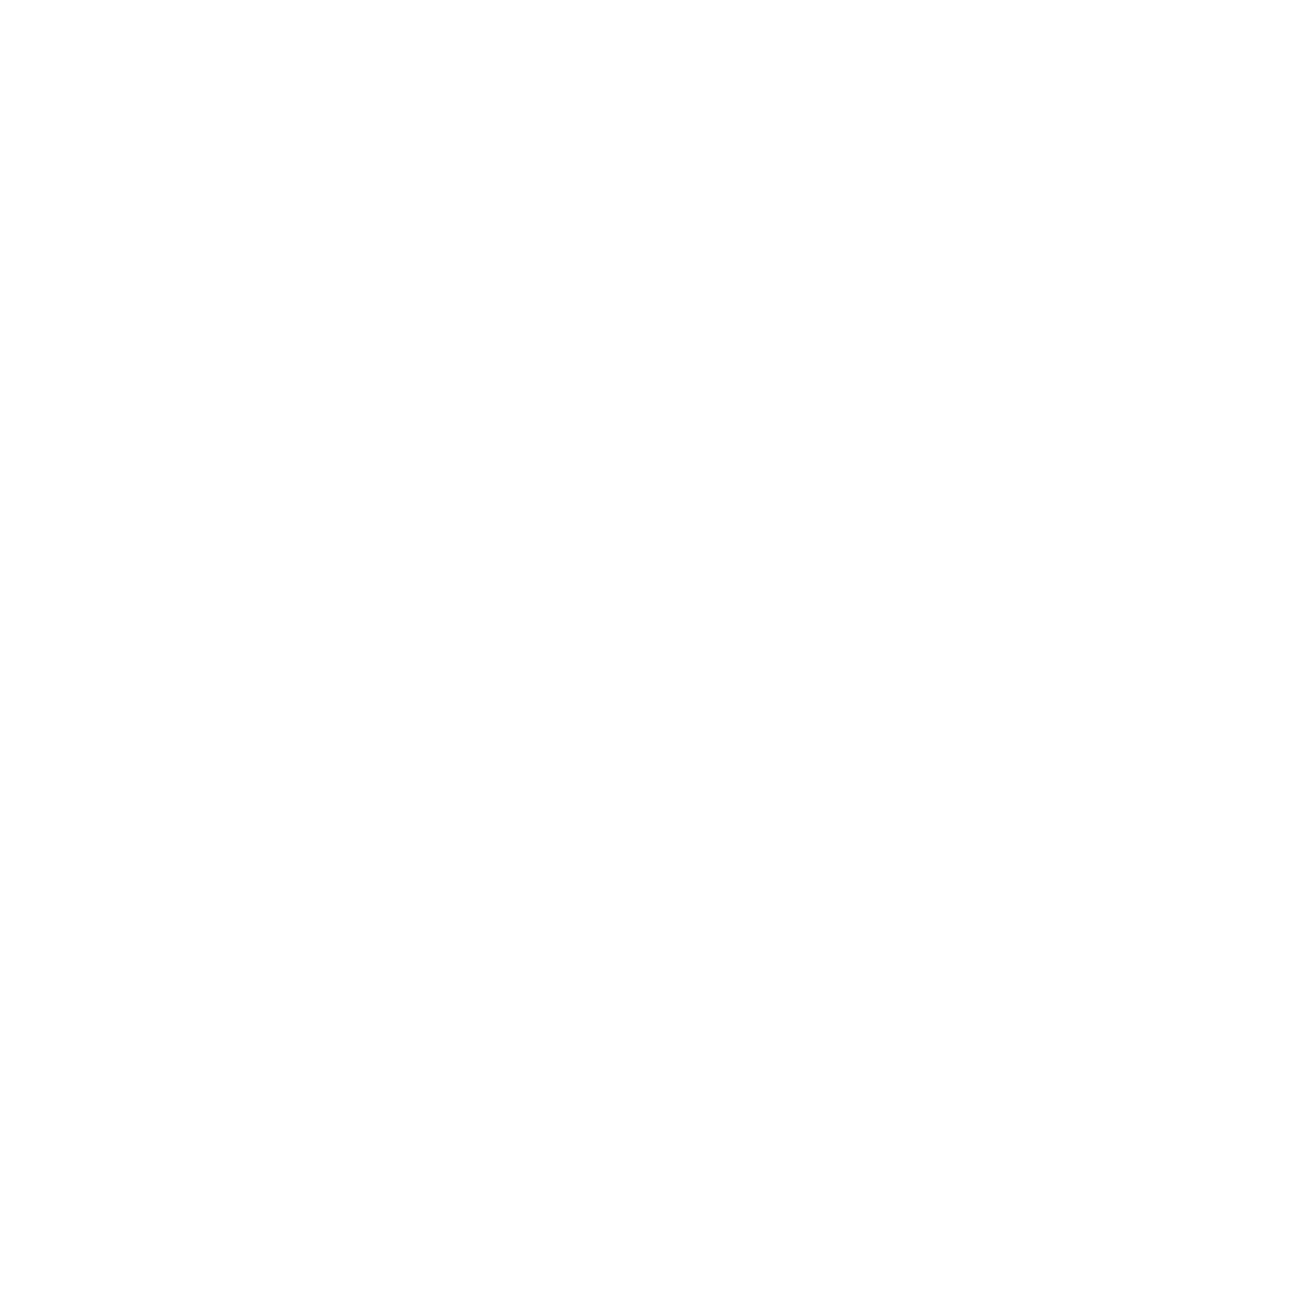

<IPython.core.display.Javascript object>


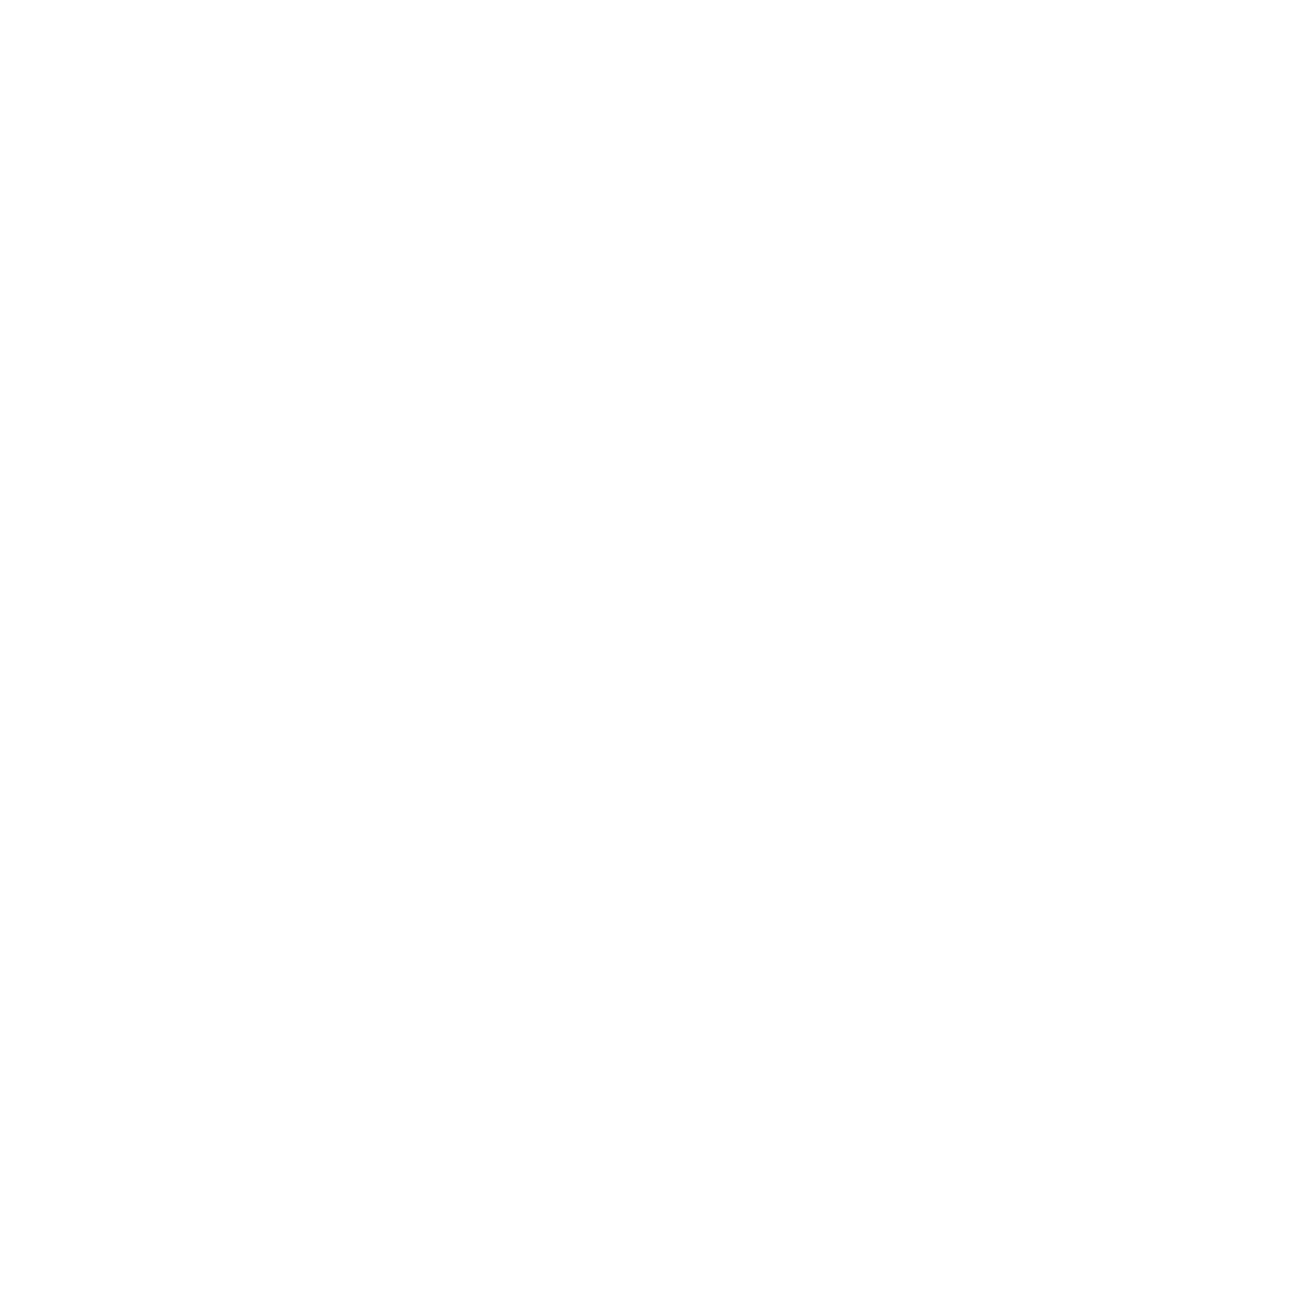

In [44]:
%matplotlib notebook

fig, ax = plt.subplots(
    figsize=(9, 9),
    subplot_kw=dict(projection=Custom())
)

ax.coastlines(resolution='110m', linewidth=0.5)
ax.gridlines()
cs = ax.pcolormesh(x, y, ice, cmap=plt.cm.Blues,
                   transform=Custom())

# Extras 2: Quiver

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs


def sample_data(shape=(20, 30)):
    crs = ccrs.NorthPolarStereo()
    scale = 1e7
    x = np.linspace(-scale, scale, shape[1])
    y = np.linspace(-scale, scale, shape[0])

    x2d, y2d = np.meshgrid(x, y)
    u = 10 * np.cos(2 * x2d / scale + 3 * y2d / scale)
    v = 20 * np.cos(6 * x2d / scale)

    return x, y, u, v, crs

x, y, u, v, vector_crs = sample_data(shape=(50, 50))

In [46]:
def set_axis():
    subplot_kw = dict(projection=ccrs.PlateCarree())
    fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16, 10),
                                   subplot_kw=subplot_kw,)
    ax0.coastlines('50m')
    ax0.set_extent([-45, 55, 20, 80], ccrs.PlateCarree())
    ax1.coastlines('50m')
    ax1.set_extent([-45, 55, 20, 80], ccrs.PlateCarree())
    return ax0, ax1

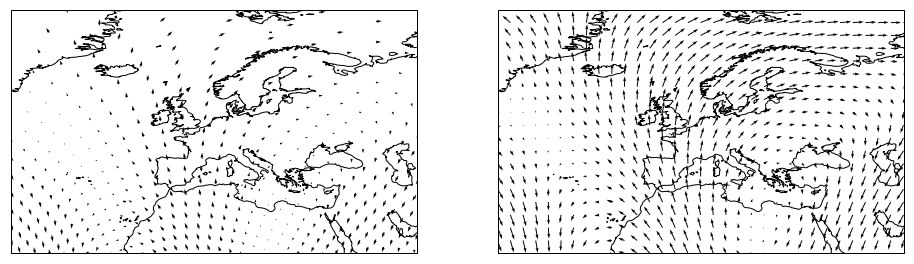

In [47]:
ax0, ax1 = set_axis()
q0 = ax0.quiver(x, y, u, v, transform=vector_crs)
q1 = ax1.quiver(x, y, u, v, transform=vector_crs,
                regrid_shape=20)

![](http://imgs.xkcd.com/comics/map_projections.png )